<center>

---

# Deep Learning
## MBA em Big Data & Data Science
## Faculdade Impacta

</center>

---

### Trabalho Final

Alunos:
Anderson Santos Alves,
Guilherme Martins,
Vitor Nascimento

**Problema escolhido:** Avaliar modelo de classificação da qualidade do vinho a partir de suas características físicas e químicas com o impacto da realização do treinamento com a base de dados normalizada e não normalizada.

Este trabalho se baseou em artigo públicado em xxxxxxx

Para este trabalho foi utilizado o Algoritmo de aprendizagem: Rede Neural Densa (RND)


### Bibliotecas

In [1]:
from numpy import loadtxt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [4]:
random_state = 42

## Extração dos dados

In [2]:
# Informa a URL de importação do dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# Informa o cabeçalho das colunas
colunas = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

# Lê o arquivo utilizando as colunas informadas
df_vinho = pd.read_csv(url, names=colunas, skiprows=1, delimiter=';')

### Análise descritiva dos dados

In [13]:
# Análise descritiva dos dados
df_vinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
df_vinho.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
#verificando valores nulos
df_vinho.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Não foram identificados **dados nulos**.

---

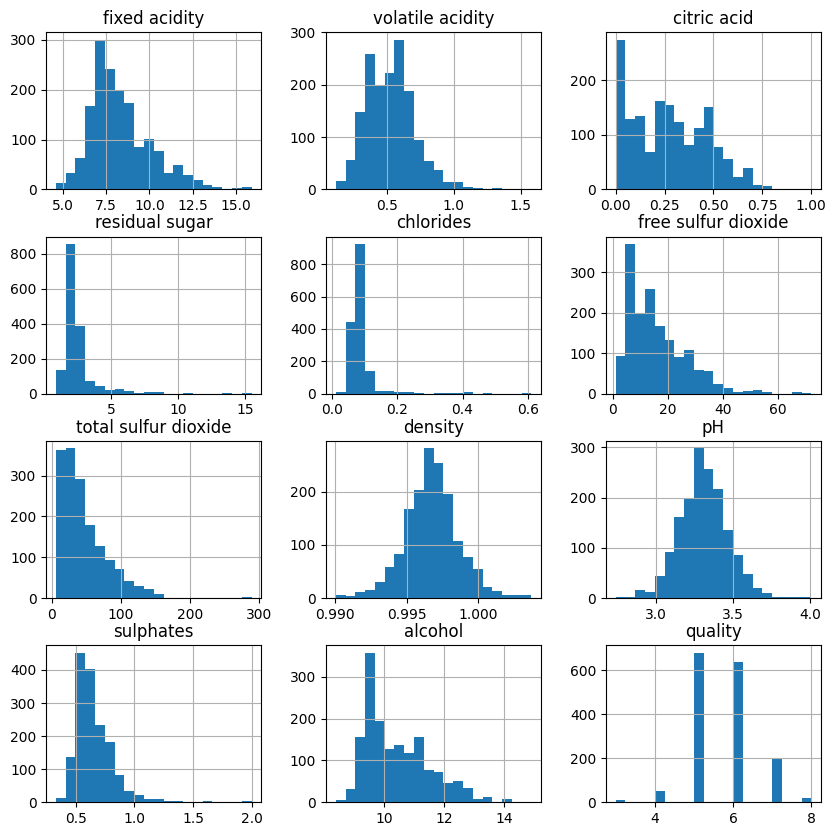

In [90]:
#plot histogram
df_vinho.hist(bins=20,figsize=(10,10))
#plot showing
plt.show()

Os dados da variável **'quality'**, como podemos ver através do histograma, caracterizam esse conjunto de dados como **desbalanceado**.

---

## Separação dos dados de treino e de teste

In [118]:
# separa o dataset entre variáveis alvo e explicativas
X = df_vinho.drop(['quality'], axis=1).values #variáveis explicativas
y = df_vinho['quality'].values #variável alvo

#separa o dataset entre x e y de treino e de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Modelo de RND (sem pré processamento)

## Parâmetros e treinamento do modelo

In [92]:
# definir o modelo com keras
# inicializar o modelo sequencial
model = Sequential()

# inicializar a primeira camada, com 12 neurônios, 11 entradas utilizando a função ReLU
model.add(Dense(11, input_dim=X_train.shape[1], activation='relu'))

# inicializar a segunda camada com 8 neurônios e a função ReLU
model.add(Dense(8, activation='relu'))

# inicializar a última camada (camada de saída) com um neurônio e a função linear
model.add(Dense(1, activation='linear'))

In [93]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','accuracy'])

In [94]:
resultado = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test,y_test))

Epoch 1/150
128/128 [==============================] - 1s 4ms/step - loss: 14.8958 - mse: 14.8958 - mae: 3.1295 - accuracy: 0.0000e+00 - val_loss: 1.6603 - val_mse: 1.6603 - val_mae: 0.9519 - val_accuracy: 0.0000e+00
Epoch 2/150
128/128 [==============================] - 0s 3ms/step - loss: 1.0533 - mse: 1.0533 - mae: 0.7725 - accuracy: 0.0000e+00 - val_loss: 0.7423 - val_mse: 0.7423 - val_mae: 0.6589 - val_accuracy: 0.0000e+00
Epoch 3/150
128/128 [==============================] - 0s 3ms/step - loss: 0.7360 - mse: 0.7360 - mae: 0.6595 - accuracy: 0.0000e+00 - val_loss: 0.5945 - val_mse: 0.5945 - val_mae: 0.5954 - val_accuracy: 0.0000e+00
Epoch 4/150
128/128 [==============================] - 0s 3ms/step - loss: 0.6346 - mse: 0.6346 - mae: 0.6110 - accuracy: 0.0000e+00 - val_loss: 0.5351 - val_mse: 0.5351 - val_mae: 0.5777 - val_accuracy: 0.0000e+00
Epoch 5/150
128/128 [==============================] - 0s 3ms/step - loss: 0.5765 - mse: 0.5765 - mae: 0.5834 - accuracy: 0.0000e+00 - val

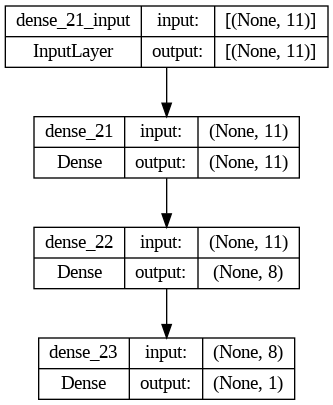

In [95]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image('model.png')

## Métrica de Avaliação

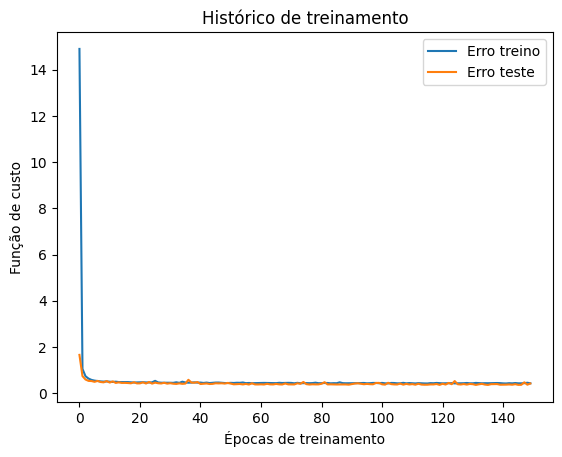

In [96]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de treinamento')
plt.xlabel('Épocas de treinamento')
plt.ylabel('Função de custo')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()

In [97]:
_, mse, mae, accuracy = model.evaluate(X_test, y_test)

print(f'Erro quadrático médio: {mse: .2f}\nErro absoluto médio:  {mae: .2f}\nAcurácia: {accuracy*100: .2f}' )

10/10 [==============================] - 0s 3ms/step - loss: 0.4216 - mse: 0.4216 - mae: 0.5216 - accuracy: 0.0000e+00
Erro quadrático médio:  0.42
Erro absoluto médio:   0.52
Acurácia:  0.00


## Desenho do modelo

In [75]:
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0,
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units,
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0,
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]

    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025

    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color

        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)

        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)

            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')

    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left],
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space],
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

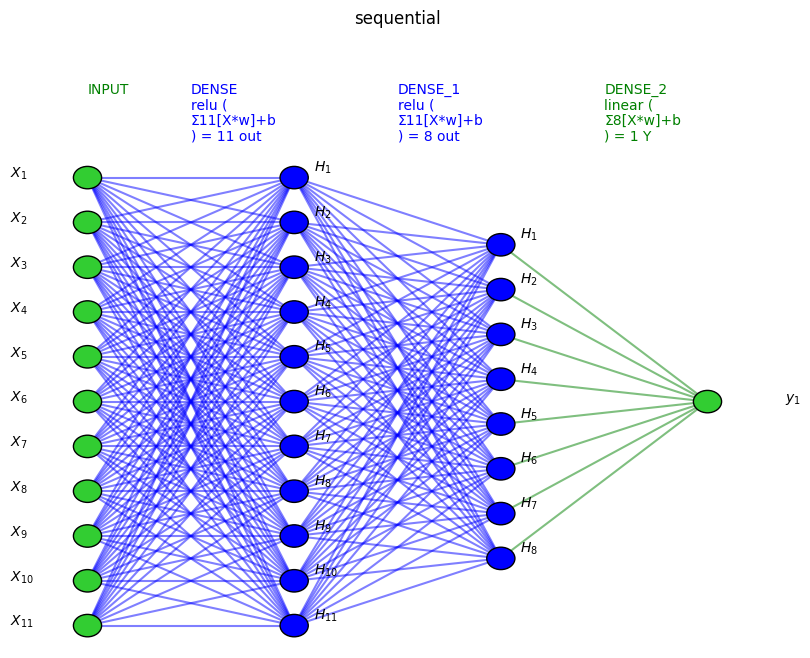

In [76]:
visualize_nn(model, description=True, figsize=(10,8))

# Modelo RND (com pré processamento)


## Normalizando dados de treino e teste

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
# creating scaler scale var.
norm = MinMaxScaler()
# fit the scale
norm_fit = norm.fit(X_train)
# transformation of training data
scal_xtrain = norm_fit.transform(X_train)
# transformation of testing data
scal_xtest = norm_fit.transform(X_test)
print(scal_xtrain)

[[0.36283186 0.39041096 0.31       ... 0.58267717 0.22699387 0.49230769]
 [0.13274336 0.06164384 0.4        ... 0.4015748  0.13496933 0.53846154]
 [0.55752212 0.18493151 0.47       ... 0.44094488 0.23312883 0.21538462]
 ...
 [0.2300885  0.34246575 0.06       ... 0.60629921 0.10429448 0.16923077]
 [0.2920354  0.05479452 0.35       ... 0.45669291 0.26380368 0.53846154]
 [0.10619469 0.11643836 0.26       ... 0.51181102 0.10429448 0.78461538]]


## Parâmetros e treinamento do modelo

In [100]:
# definir o modelo com keras
# inicializar o modelo sequencial
norm_model = Sequential()

# inicializar a primeira camada, com 12 neurônios, 11 entradas utilizando a função ReLU
norm_model.add(Dense(11, input_dim=scal_xtrain.shape[1], activation='relu'))

# inicializar a segunda camada com 8 neurônios e a função ReLU
norm_model.add(Dense(8, activation='relu'))

# inicializar a última camada (camada de saída) com um neurônio e a função linear
norm_model.add(Dense(1, activation='linear'))

In [101]:
norm_model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','accuracy'])

In [102]:
norm_resultado = norm_model.fit(scal_xtrain, y_train, epochs=150, batch_size=10, validation_data=(scal_xtest,y_test))

Epoch 1/150
128/128 [==============================] - 1s 4ms/step - loss: 20.0613 - mse: 20.0613 - mae: 4.3457 - accuracy: 0.0000e+00 - val_loss: 8.3983 - val_mse: 8.3983 - val_mae: 2.7770 - val_accuracy: 0.0000e+00
Epoch 2/150
128/128 [==============================] - 0s 2ms/step - loss: 2.2676 - mse: 2.2676 - mae: 1.1895 - accuracy: 0.0000e+00 - val_loss: 0.8734 - val_mse: 0.8734 - val_mae: 0.7392 - val_accuracy: 0.0000e+00
Epoch 3/150
128/128 [==============================] - 0s 3ms/step - loss: 0.8427 - mse: 0.8427 - mae: 0.7165 - accuracy: 0.0000e+00 - val_loss: 0.8162 - val_mse: 0.8162 - val_mae: 0.7136 - val_accuracy: 0.0000e+00
Epoch 4/150
128/128 [==============================] - 1s 4ms/step - loss: 0.7864 - mse: 0.7864 - mae: 0.6879 - accuracy: 0.0000e+00 - val_loss: 0.7562 - val_mse: 0.7562 - val_mae: 0.6839 - val_accuracy: 0.0000e+00
Epoch 5/150
128/128 [==============================] - 0s 4ms/step - loss: 0.7294 - mse: 0.7294 - mae: 0.6551 - accuracy: 0.0000e+00 - val

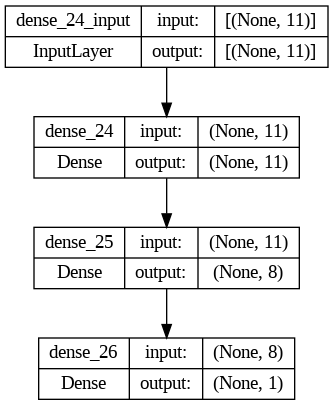

In [103]:
plot_model(norm_model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image('model.png')

## Métricas de avaliação

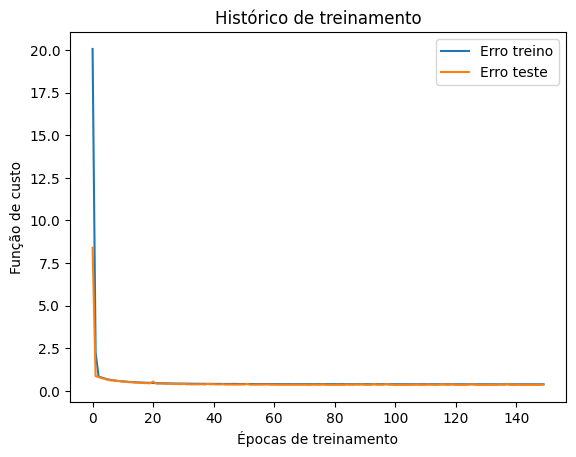

In [104]:
plt.plot(norm_resultado.history['loss'])
plt.plot(norm_resultado.history['val_loss'])
plt.title('Histórico de treinamento')
plt.xlabel('Épocas de treinamento')
plt.ylabel('Função de custo')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()

In [105]:
_, mse, mae, accuracy = norm_model.evaluate(scal_xtest, y_test)

print(f'Erro quadrático médio: {mse: .2f}\nErro absoluto médio:  {mae: .2f}\nAcurácia: {accuracy*100: .2f}' )

10/10 [==============================] - 0s 2ms/step - loss: 0.3754 - mse: 0.3754 - mae: 0.4879 - accuracy: 0.0000e+00
Erro quadrático médio:  0.38
Erro absoluto médio:   0.49
Acurácia:  0.00


## Desenho Modelo

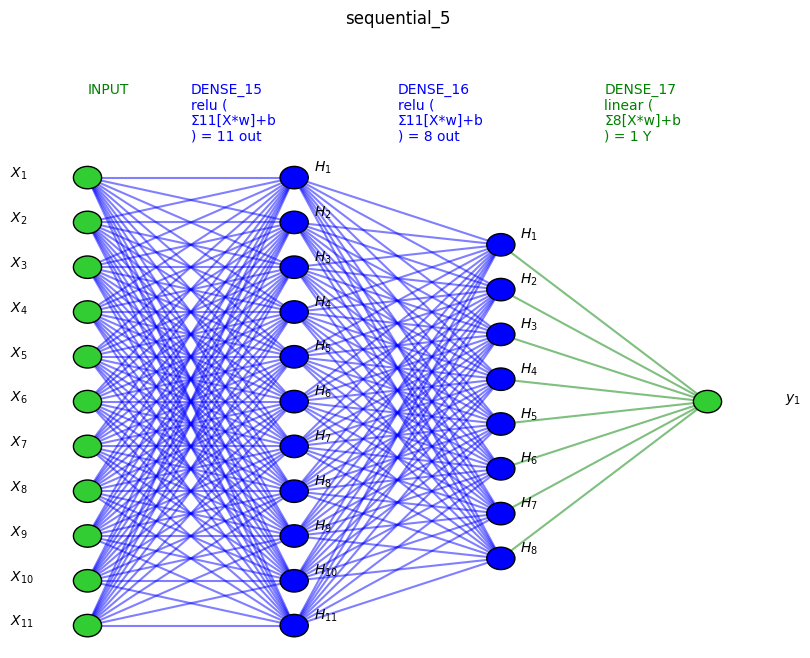

In [89]:
visualize_nn(norm_model, description=True, figsize=(10,8))